In [1]:
# Import dependencies.
import pandas as pd
import numpy as np

In [2]:
# Read in CSV file.
df = pd.read_csv("prepped_data.csv")

In [3]:
df.head()

,id,program,previous_college,ethnic_description,gender,grad_date,hs_ged,hs_ged_grad_date,date_of_birth,hours_attended,hours_scheduled,attendance_percentage,gpa,default_status
0,10579,MC-FT 600,N,Hispanic/Latino,M,3/16/2020,High School,6/25/2015,2/5/1997,480.75,600.0,0.8013,82.5,no
1,11118,PTF,Y,Black or African American,M,12/15/2021,High School,5/1/2010,12/17/1991,150.00,150.0,1.0000,95.0,no
2,10644,MC-FT 600,Y,White,M,6/30/2020,High School,1/1/1986,12/7/1967,565.00,600.0,0.9417,90.5,no
3,10560,MC-FT 600,Y,White,M,12/12/2019,High School,6/17/2017,9/23/1999,523.50,600.0,0.8725,81.0,no
4,10509,PTF,Y,Hispanic/Latino,M,6/20/2019,High School,6/29/2008,11/29/1989,142.75,150.0,0.9517,85.0,no


In [4]:
df.tail()

,id,program,previous_college,ethnic_description,gender,grad_date,hs_ged,hs_ged_grad_date,date_of_birth,hours_attended,hours_scheduled,attendance_percentage,gpa,default_status
413,10818,PTF,N,White,F,3/29/2021,High School,6/17/2016,5/27/1998,145.50,150.0,0.9700,96.0,no
414,10452,MC-FT 600,Y,Hispanic/Latino,F,6/12/2019,High School,6/1/2006,4/21/1988,556.50,600.0,0.9275,89.5,no
415,10481,PTF,N,Race and Ethnicity Unknown,F,6/20/2019,High School,12/1/2010,4/16/1992,139.25,150.0,0.9283,88.0,no
416,10521,MC-FT 600,Y,White,M,12/12/2019,High School,6/1/2005,4/15/1987,538.75,600.0,0.8979,94.5,yes
417,10822,MC-FT 600,Y,Black or African American,M,6/15/2021,High School,6/1/2011,9/10/1992,539.00,600.0,0.8983,77.0,no


In [5]:
# Check for null values.
df.isnull().sum()

id                       0
program                  0
previous_college         0
ethnic_description       0
gender                   0
grad_date                0
hs_ged                   0
hs_ged_grad_date         7
date_of_birth            0
hours_attended           0
hours_scheduled          0
attendance_percentage    0
gpa                      0
default_status           0
dtype: int64

In [6]:
# Drop null values.
df = df.dropna()

In [7]:
# Check data types.
df.dtypes

id                         int64
program                   object
previous_college          object
ethnic_description        object
gender                    object
grad_date                 object
hs_ged                    object
hs_ged_grad_date          object
date_of_birth             object
hours_attended           float64
hours_scheduled          float64
attendance_percentage    float64
gpa                      float64
default_status            object
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2 = df.copy()
df2["gender"] = le.fit_transform(df2["gender"])
df2["program"] = le.fit_transform(df2["program"])
df2["hs_ged"] = le.fit_transform(df2["hs_ged"])
df2["ethnic_description"] = le.fit_transform(df2["ethnic_description"])
df2["previous_college"] = le.fit_transform(df2["previous_college"])
df2["default_status"] = le.fit_transform(df2["default_status"])

In [9]:
df2["grad_date"]= pd.to_datetime(df2["grad_date"])
df2["hs_ged_grad_date"]= pd.to_datetime(df2["hs_ged_grad_date"])
df2["date_of_birth"]= pd.to_datetime(df2["date_of_birth"])

In [10]:
df2.dtypes

id                                int64
program                           int32
previous_college                  int32
ethnic_description                int32
gender                            int32
grad_date                datetime64[ns]
hs_ged                            int32
hs_ged_grad_date         datetime64[ns]
date_of_birth            datetime64[ns]
hours_attended                  float64
hours_scheduled                 float64
attendance_percentage           float64
gpa                             float64
default_status                    int32
dtype: object

In [11]:
# Calculate the years between hs_ged_grad_date and grad_date.
# Save values in a new column.

df2["years_between_education"] = df2["grad_date"] - df2["hs_ged_grad_date"]

# Convert the difference in terms of years.
df2["years_between_education"] = df2.years_between_education / np.timedelta64(1, "Y")

In [12]:
df2.head()

,id,program,previous_college,ethnic_description,gender,grad_date,hs_ged,hs_ged_grad_date,date_of_birth,hours_attended,hours_scheduled,attendance_percentage,gpa,default_status,years_between_education
0,10579,0,0,3,1,2020-03-16,2,2015-06-25,1997-02-05,480.75,600.0,0.8013,82.5,0,4.725627
1,11118,1,1,2,1,2021-12-15,2,2010-05-01,1991-12-17,150.00,150.0,1.0000,95.0,0,11.625153
2,10644,0,1,7,1,2020-06-30,2,1986-01-01,1967-12-07,565.00,600.0,0.9417,90.5,0,34.494890
3,10560,0,1,7,1,2019-12-12,2,2017-06-17,1999-09-23,523.50,600.0,0.8725,81.0,0,2.486020
4,10509,1,1,3,1,2019-06-20,2,2008-06-29,1989-11-29,142.75,150.0,0.9517,85.0,0,10.973531


In [13]:
# Calculate the years between date_of_birth and grad_date.
# Save values in a new column.

df2["age_at_grad"] = df2["grad_date"] - df2["date_of_birth"]

# Convert the difference in terms of years.
df2["age_at_grad"] = df2.age_at_grad / np.timedelta64(1, "Y")

In [14]:
df2.head()

,id,program,previous_college,ethnic_description,gender,grad_date,hs_ged,hs_ged_grad_date,date_of_birth,hours_attended,hours_scheduled,attendance_percentage,gpa,default_status,years_between_education,age_at_grad
0,10579,0,0,3,1,2020-03-16,2,2015-06-25,1997-02-05,480.75,600.0,0.8013,82.5,0,4.725627,23.107935
1,11118,1,1,2,1,2021-12-15,2,2010-05-01,1991-12-17,150.00,150.0,1.0000,95.0,0,11.625153,29.996509
2,10644,0,1,7,1,2020-06-30,2,1986-01-01,1967-12-07,565.00,600.0,0.9417,90.5,0,34.494890,52.565077
3,10560,0,1,7,1,2019-12-12,2,2017-06-17,1999-09-23,523.50,600.0,0.8725,81.0,0,2.486020,20.219443
4,10509,1,1,3,1,2019-06-20,2,2008-06-29,1989-11-29,142.75,150.0,0.9517,85.0,0,10.973531,29.555706


In [15]:
# Drop grad_date, hs_ged_grad_date, date_of_birth, hours_attended, hours_scheduled columns.
df3 = df2.drop(["grad_date", "hs_ged_grad_date", "date_of_birth", "hours_attended", "hours_scheduled"], axis = 1)
df3.head()

,id,program,previous_college,ethnic_description,gender,hs_ged,attendance_percentage,gpa,default_status,years_between_education,age_at_grad
0,10579,0,0,3,1,2,0.8013,82.5,0,4.725627,23.107935
1,11118,1,1,2,1,2,1.0000,95.0,0,11.625153,29.996509
2,10644,0,1,7,1,2,0.9417,90.5,0,34.494890,52.565077
3,10560,0,1,7,1,2,0.8725,81.0,0,2.486020,20.219443
4,10509,1,1,3,1,2,0.9517,85.0,0,10.973531,29.555706


In [16]:
# Review descriptive statistics.
df3.describe()

,id,program,previous_college,ethnic_description,gender,hs_ged,attendance_percentage,gpa,default_status,years_between_education,age_at_grad
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,10685.367397,0.472019,0.776156,3.773723,0.661800,1.858881,0.931755,88.699927,0.177616,12.260920,31.324900
std,215.863843,0.499825,0.417327,2.082421,0.473673,0.362293,0.058923,7.729065,0.382655,9.301917,9.414520
min,10302.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.786300,36.000000,0.000000,0.303908,17.708783
25%,10519.500000,0.000000,1.000000,2.000000,0.000000,2.000000,0.892900,84.500000,0.000000,5.631875,24.474151
50%,10644.000000,0.000000,1.000000,3.000000,1.000000,2.000000,0.946700,90.000000,0.000000,10.086449,29.114903
75%,10829.000000,1.000000,1.000000,6.000000,1.000000,2.000000,0.979150,94.000000,0.000000,15.506136,34.859032
max,11194.000000,1.000000,1.000000,7.000000,1.000000,2.000000,1.000000,99.000000,1.000000,47.283654,64.803521


<AxesSubplot:>

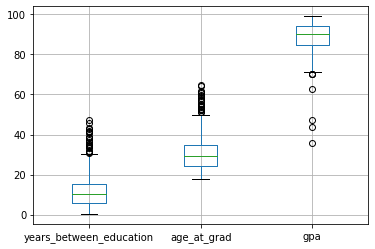

In [17]:
# Create a box plot for years_between_education, age_at_grad, and gpa to review possible outliers.

df3.boxplot(column = ["years_between_education", "age_at_grad", "gpa"])

In [18]:
# years_between_education and age_at_grad have outliers, however, these will not be removed.
# The school has a very large span of ages for students and I do not want this data to be lost.

# gpa has outliers, which implies that these outliers below 70 are errors in the original data due to 70 being
# the minimum GPA for students to graduate.

In [19]:
# Calculate number of GPAs below 70.

gpa_below_70 = df3["gpa"][df3["gpa"] < 70].count()
gpa_below_70

4

In [20]:
# Remove rows with GPAs < 70.

df3.drop(df3.index[df3["gpa"] < 70], inplace=True)

In [21]:
df3.describe()

,id,program,previous_college,ethnic_description,gender,hs_ged,attendance_percentage,gpa,default_status,years_between_education,age_at_grad
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,10685.051597,0.469287,0.773956,3.781327,0.663391,1.859951,0.931817,89.106880,0.179361,12.146385,31.207122
std,216.749338,0.499670,0.418783,2.091231,0.473132,0.361364,0.058684,6.506647,0.384127,9.241119,9.334590
min,10302.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.786300,70.000000,0.000000,0.303908,17.708783
25%,10518.500000,0.000000,1.000000,2.000000,0.000000,2.000000,0.892900,84.750000,0.000000,5.525096,24.327673
50%,10643.000000,0.000000,1.000000,3.000000,1.000000,2.000000,0.946700,90.000000,0.000000,10.078236,29.109427
75%,10829.000000,1.000000,1.000000,6.000000,1.000000,2.000000,0.978300,94.250000,0.000000,15.063964,34.530483
max,11194.000000,1.000000,1.000000,7.000000,1.000000,2.000000,1.000000,99.000000,1.000000,47.283654,64.803521


In [22]:
# Check total number of rows and columns.
df3.shape

(407, 11)

In [23]:
# Export cleaned data to a CSV file. 
df3.to_csv("cleaned_data.csv", index=False)